In [ ]:
!cp '/content/drive/MyDrive/garbage.zip' '/content'

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
!unzip garbage.zip

Streaming output truncated to the last 5000 lines.
  inflating: Garbage classification/Garbage classification/cardboard/cardboard152.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard153.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard154.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard155.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard156.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard157.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard158.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard159.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard16.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard160.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/c

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [ ]:
dataset_path = '/content/garbage classification/Garbage classification'

In [ ]:
batch_size = 32
epochs = 100
image_size = (150,150)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255 ,
    validation_split = 0.2,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [ ]:
training_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training'
)

Found 2024 images belonging to 6 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 503 images belonging to 6 classes.


In [ ]:
labels = (training_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [ ]:
model = Sequential()

# Convolution Filters
model.add(Conv2D(32,(3,3),activation='relu',input_shape = (image_size[0],image_size[1],3)))

# # Pooling layer
model.add(MaxPooling2D(2,2))

# # Fully Connected layer

model.add(Conv2D(32,(3,3), padding='same', input_shape=(image_size[0],image_size[1],3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
# model.add(Dense(128,activation='relu'))
# model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(6,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 32)        0

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(training_generator,
          steps_per_epoch = training_generator.samples //batch_size,
           validation_data=validation_generator,
           validation_steps = validation_generator.samples // batch_size,
                    epochs = 30)


Epoch 1/30
63/63 [==============================] - 29s 458ms/step - loss: 0.5244 - accuracy: 0.7947 - val_loss: 1.2824 - val_accuracy: 0.5917
Epoch 2/30
63/63 [==============================] - 19s 289ms/step - loss: 0.5504 - accuracy: 0.7947 - val_loss: 1.3753 - val_accuracy: 0.5771
Epoch 3/30
63/63 [==============================] - 17s 273ms/step - loss: 0.5025 - accuracy: 0.8112 - val_loss: 1.2737 - val_accuracy: 0.6042
Epoch 4/30
63/63 [==============================] - 25s 391ms/step - loss: 0.5270 - accuracy: 0.8057 - val_loss: 1.1498 - val_accuracy: 0.6187
Epoch 5/30
63/63 [==============================] - 19s 301ms/step - loss: 0.4882 - accuracy: 0.8143 - val_loss: 1.2664 - val_accuracy: 0.6104
Epoch 6/30
63/63 [==============================] - 19s 308ms/step - loss: 0.4376 - accuracy: 0.8424 - val_loss: 1.2769 - val_accuracy: 0.6062
Epoch 7/30
63/63 [==============================] - 18s 295ms/step - loss: 0.4810 - accuracy: 0.8168 - val_loss: 1.1707 - val_accuracy: 0.6292

In [ ]:
import matplotlib.pyplot as plt

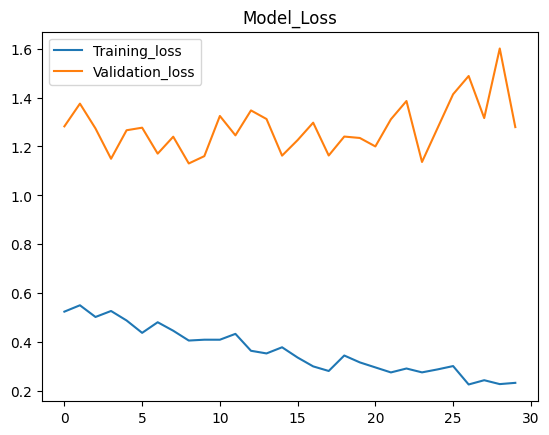

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_Loss')
plt.legend(['Training_loss','Validation_loss'])
plt.show()

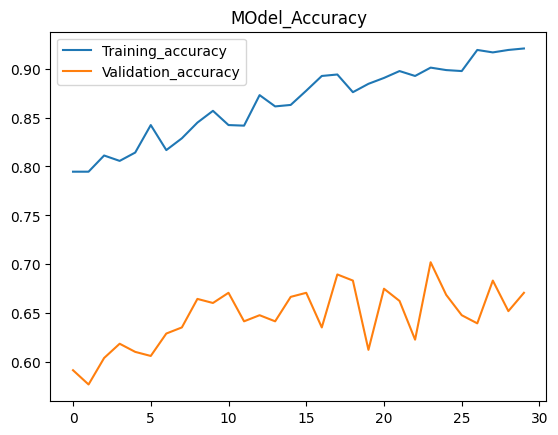

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MOdel_Accuracy')
plt.legend(['Training_accuracy','Validation_accuracy'])

plt.show()

1/1 [==============================] - 0s 132ms/step


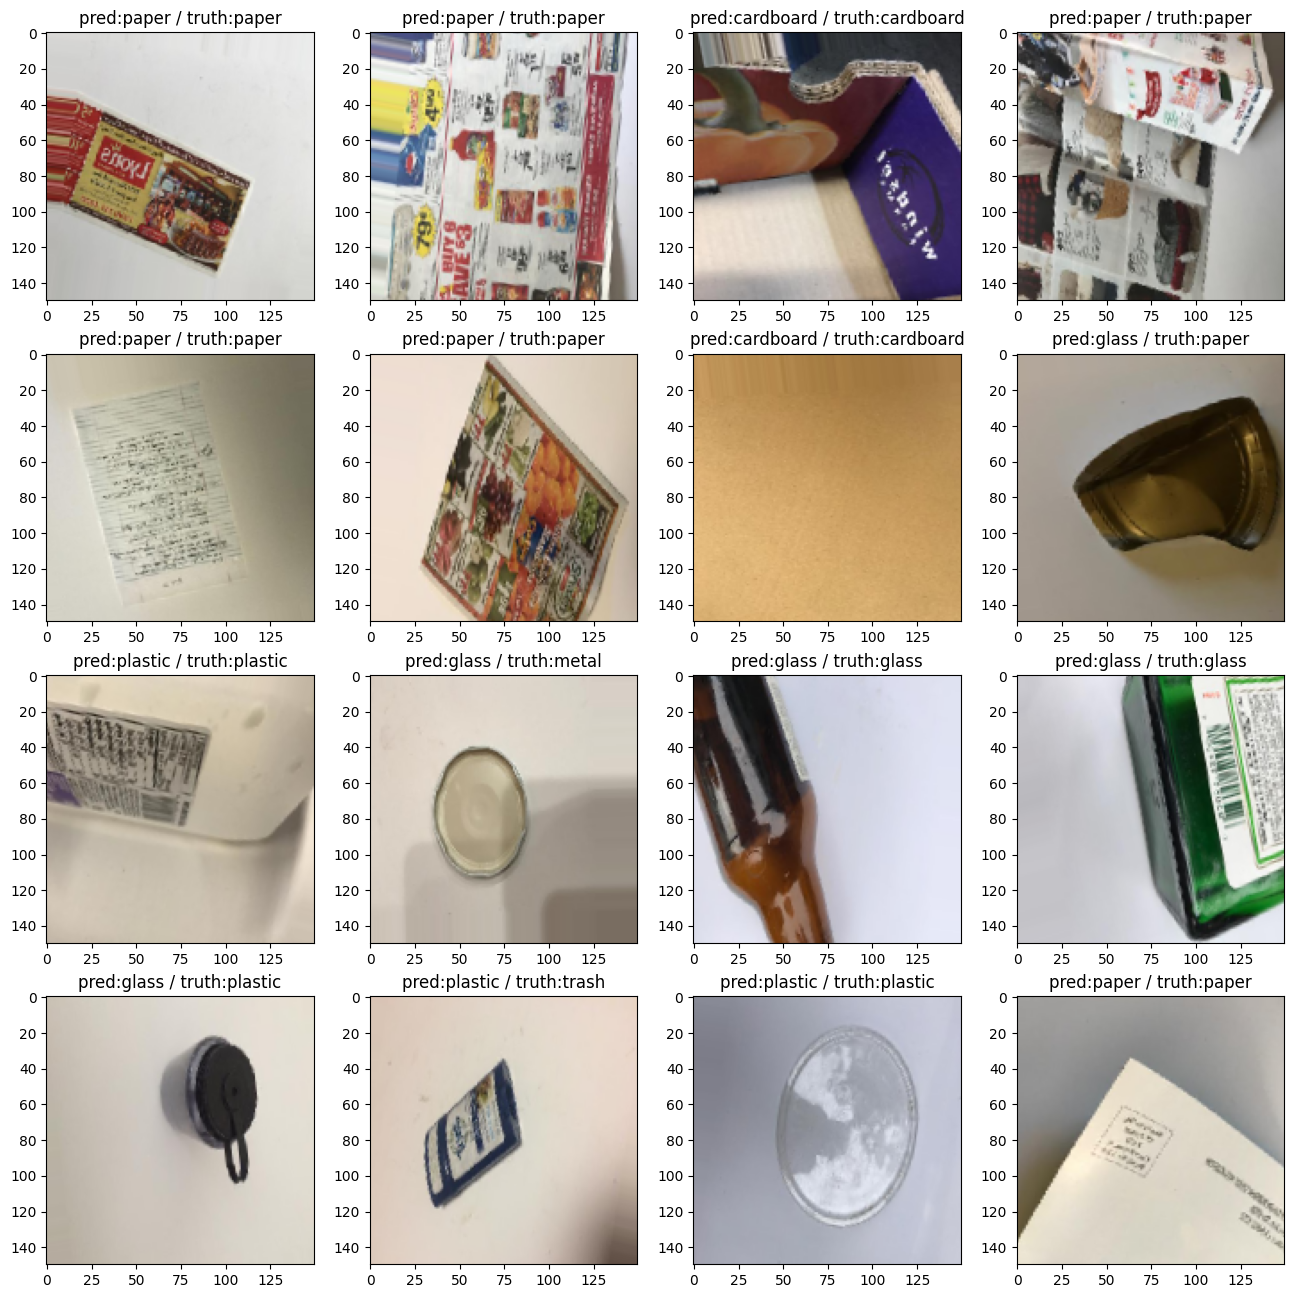

In [ ]:
test_x, test_y = validation_generator.__getitem__(1)

preds = model.predict(test_x)

plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])

In [ ]:
from tensorflow.keras.preprocessing import image

def predict_image(image_path):

    img = image.load_img(image_path,target_size = image_size)
    img = image.img_to_array(img)  # converting to array
    img = np.expand_dims(img,axis = 0)  # expanding dimensions to match  for model
    img /=255.0 # normalize

    prediction = model.predict(img)
    return prediction

In [ ]:
pic = '/content/download (5).jpeg'

In [ ]:
prediction = predict_image(pic)
print(prediction)
labels[prediction[0].argmax()]

1/1 [==============================] - 0s 18ms/step
[[8.5568327e-01 6.6650321e-09 1.1724096e-01 2.7075736e-02 2.8490401e-11
  7.8944047e-12]]


'cardboard'

In [ ]:
pic2 = '/content/download (1).jpeg'
prediction = predict_image(pic2)
print(prediction)
labels[prediction[0].argmax()]

1/1 [==============================] - 0s 28ms/step
[[2.8155994e-06 9.8292112e-05 9.9987698e-01 8.0938253e-06 1.3866718e-05
  1.2133497e-08]]


'metal'

In [ ]:
model.save('garbage_classification_new.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!cp '/content/garbage_classification_new.h5' '/content/drive/MyDrive/Colab Notebooks/CNN'